# Simple Linear Regression

- Starter for understanding types of problems we can solve with regression

- how regression algorithm works

- hot to use this with python

## Introduction To ML in relation to regression

- It isn't new even though it is hot right now, it is a way to repackage things that have been around for a  long time

- Supervised learning: use input data to predict a value for that data

    - e.g. using credit card data to predict fraud 
    
    - e.g. financial data to predict default
    
    - e.g. use neighborhood data to predict home prices
    
- Unsupervised learning: clustering data based on common characteristics (they don't have labels)
    
    - customer segmentation
    
    - topical analysis (group documents covering similar topic)
    
- Linear regression falls into supervised ML

    - it allows us to predict a label for our data

- Simple linear regression:

    - a linear comparison of only two quantitative variables
    
        - price vs sales, hours studying v test grades
        
- we use a scatter plot, with the dependent variable on the y axis and the independent variable on the x axiss

    - dependent variable is the response variable, and it is what we want to predict
    
    - independent variable is the explanatory variable, it is what we use to predict the response
    
- Price vs sales:

    - we can usually control the price, and  we would want to see how the sales respond to the price
    
- In linear regression we use this by fitting a line through the scatter plot

## Scatter Plots

- Two quantititative variables

- we measure strength and direction of relationship

    - strength: weak, moderate, strong
    
    - relationship: positive or negative

- common summary statistic that relates to this is correlation coefficient

    - we denote this with `r`
    
    - -1 or 1 inclusive bounds
    
- We can measure correlation in a few different ways

    - pearsons correlation, which gives strength and direction
    
    - spearmans correlation coefficient

## Correlation Coefficient

- very field dependent on what is strong, weak, moderate

- rule of thumb:

    - strong 0.7 <= |r| < 1.0
    
    - moderate 0.3 <= |r| < 0.7
    
    - waek 0 <= |r| < 0.3

## What defines a line

- we identify a line by an intercept and a slope

- intercept: statistic, parameter; $b_0, \beta_0$: the expected value when the t explanatory variable is 0

- slope statistic, paraemter: $b_1, \beta_1$ the expected change in the response for each 1 unit increase in the explanotory variable

- Once we fit a line with a set of data points:

    $$\hat{y} = b_0 + b_1x $$
    
    - $b_0$ is intercept value, where explanatory variable is 0
    
    - Slope is effect on y for 1 unit change in x
    
- $\hat{y}$ denotes the x value at the line

- $y$ denotes the actual data point from the sample

## Fitting A Regression Line

- The main algorithm used to define the regression line

    - least square algorithm:
    
        - Minimize the sum of the squared vertical distance from the line to the points
        
        $$MIN(\sum_{i=1}^n (y_i - \hat{y_i})^2) $$
        
- first think about the distance from a line to all the points. If we summed all of them they would cancel each other out. So we square them.

- then we find the line that minimizes the total area of all those squares

- each distance is $y_1 - \hat{y_1}$

- we then choose the smallest of all values

- what if we chose a different value?

    - like $MIN(\sum_{i=1}^n |y_i - \hat{y_i}|) $
    
    - like $MIN(\sum_{i=1}^n e^{y_i - \hat{y_i}}) $
    
- the truth is that there are many functions which we may want to optimize on

- the mathamatical proprties that make this nice

    - some are based on calculus, others on tradition

- Python does this by default. But if we want to optimize the problem in a different way then you may have to write the probram yoourself

- below is how to calculate by hand

![](simple_linear_regression_by_hand.png)

Below we will be fitting a linear regression line in python

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline


In [6]:
df = pd.read_csv("data-2/house_price_area_only.csv")

In [8]:
# We will need to add a column for an intercept, almost 
# every case we would need an intercept
df['intercept'] = 1
# First is y then a list of x variables
lm = sm.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Sat, 11 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:28:39   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- coef/area = $b_1$, it is 348.47

- coef/intercept = $b_0$, it is 9587.89 here

- so we can build a linear model in this way:

    - $ \hat{y} = b_0 + b_1x$ 
    
    - $\hat{y} = 9588 + 348x$
    
    - where x is the area of the house
    
- for a zero priced home, it would cost 9588 dollars, and for every 1 unit increase in area, we would predict that the price will increase by 348

- we will only create a useful model if the units match up correctly across an entire column

- In regression, we see  P values `P>|t|`

    - these P values are always given for testing if the parameter for the intercept or slope are equal to 0 and the null hypothesis
    
    - Hypothesis for intercept row;
        - $H0: \beta_0 = 0$
        - $H1: \beta_0 \neq 0$
    
    - Hypothesis for area row
        - $H0: \beta_1 = 0$
        - $H1: \beta_1 \neq 0$
        
    - Python and other software does by default P values using a not equal to 
    
    - These P values give you a quick glimpse as to whether or not a particualr variable is useful on predicting a response
    
    - The P value on the area is not as useful as the one for area
    
    - this suggests that the area is statistically significant in relating to home prices

## Does the line fit the data well

- Recall correlation coefficient for understanding the two variables in regression

- How well line fits is under R^2 box through BIC

    - The closer the R^2 is to 1, the better our model fits
    
    - it is the square of the correlation coefficient
  
- The amount of variability in the response explained by the model

    - 67.8% of the variability in price can be explained by the area of the house
    
    - 33% of the variability is due to characteristics that are not the area

In [18]:
df = pd.read_csv('./data-2/carats.csv', header=None)
df.columns = ['carrats', 'price']

In [19]:
df.head()

,carrats,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


In [22]:
# We will need to add a column for an intercept, almost 
# every case we would need an intercept
df['intercept'] = 1
# First is y then a list of x variables
lm = sm.OLS(df['price'], df[['intercept', 'carrats']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           6.75e-40
Time:                        08:51:46   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -259.6259     17.319    -14.991      0.000    -294.487    -224.765
carrats     3721.0249     81.786     45.497      0.000    3556.398    3885.651
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
3721.0249 * 0.01

37.210249

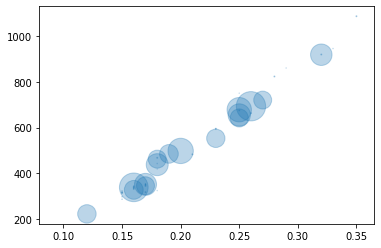

In [35]:
x = df['carrats']
y = df['price']
plt.scatter(x, y, df, alpha=0.3);

In [36]:
# Correlation coefficient
import math
math.sqrt(0.978)

0.9889388252060892

In [38]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


In [40]:
df['intercept'] = 1
# First is y then a list of x variables
lm = sm.OLS(df['MedianHomePrice'], df[['intercept', 'CrimePerCapita']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           1.17e-19
Time:                        09:00:10   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         24.0331      0.409     58.740      0.000      23.229      24.837
CrimePerCapita    -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 15 % of the variability in home price is due to crime

- 0.00 of crimepercapita shows it is statistically significant


Text(0.5, 1.0, "Crime's Effect On Home Price")

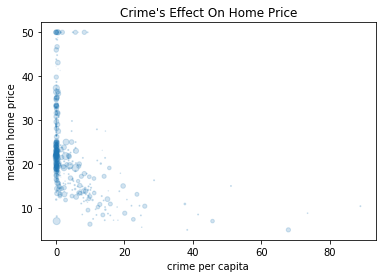

In [49]:
x = df['CrimePerCapita']
y = df['MedianHomePrice']
plt.scatter(x, y, df, alpha=0.2);
plt.xlabel("crime per capita")
plt.ylabel("median home price")
plt.title("Crime's Effect On Home Price")

In [47]:
print("Correlation Coef: {}".format(- math.sqrt(0.151)))

Correlation Coef: -0.38858718455450897
